In [2]:
# import stuff
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [4]:
#import the data from csv file with a series of NAN values 
df3 = pd.read_csv('./../data/highered_00004.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )

In [4]:
#'REFID' contains two data types and is repeated info from 'PERSONID'. Column dropped. 
df = df3.drop(['REFID'], axis=1)

In [27]:
# explanation of the survey https://highered.ipums.org/highered/survey_designs.shtml

# Respondents from each of these three surveys with science or engineering degrees                               ##
# or occupations are compiled into one dataset: the SESTAT (the Scientists and Engineers Statistical Data System)##

df.info(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478747 entries, 0 to 478746
Data columns (total 33 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
CTZUSIN     478747 non-null int64
CTZUS       438777 non-null float64
NBAMED      463945 non-null float64
NBAMEMG     465494 non-null float64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-null float64
LOOKWK      71269 non-null float64
OCEDRLP     407478 non-null float64
NOCPR       407478 non-null float64
NOCPRMG     407478 non-null float64
SALARY      407478 non-null float64
CPI2009C    478747 non-null float64
JOBSATIS    4074

**Use string catagorical data to replace numerical data for easy understanding**

In [6]:
#change the minority column to string containing the actual value
min_map = {0: 'Not minority', 1: 'Minority'}
df['MNTRS'] = df['MINRTY'].map(min_map)

In [7]:
#change the gender column to string containing the actual 'female' or 'male' value
gen_map = {1: 'Female', 2: 'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

In [8]:
major_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['MajorS'] = df['NDGMEMG'].map(major_map)

In [9]:
job_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['JobS'] = df['NOCPRMG'].map(job_map)

In [10]:
#change the race column to string containing the actual value
race_map = {1: 'Asian', 2: 'White', 3: 'Other Minorities', 4: 'Other'}
df['RACES'] = df['RACETH'].map(race_map)

In [11]:
#change the birth in US column to string containing the actual value
birth_map = {0: 'Not in the US', 1: 'Born in the US'}
df['BUSS'] = df['BTHUS'].map(birth_map)

In [12]:
df = df.drop(['MINRTY','GENDER','RACETH','BTHUS','FNVS', 'CHTOT', 'BA03Y5'],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478747 entries, 0 to 478746
Data columns (total 32 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
CTZUSIN     478747 non-null int64
CTZUS       438777 non-null float64
NBAMED      463945 non-null float64
NBAMEMG     465494 non-null float64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-null float64
LOOKWK      71269 non-null float64
OCEDRLP     407478 non-null float64
NOCPR       407478 non-null float64
NOCPRMG     407478 non-null float64
SALARY      407478 non-null float64
CPI2009C    478747 non-null float64
JOBSATIS    4074

**General question: How is the age and salary distribution for the data?**
The KDE pair plot with Age and SALARY shows the distributions and relationships between the two columns. 
It is presented below that:
1. The age distributes evenly between 30 and 60. There is s slight peak right before 30 and a tail after 60.
2. The distribution of salary appears to be bimodal: one peak at around 60,000 and one sharp peak at 150,000. The reason for the 150,000 peak is from the capped value of this column. 
3. Younger people makes less money generally. 
4. The salary goes up when they are at an older age, until around 50 years old. 


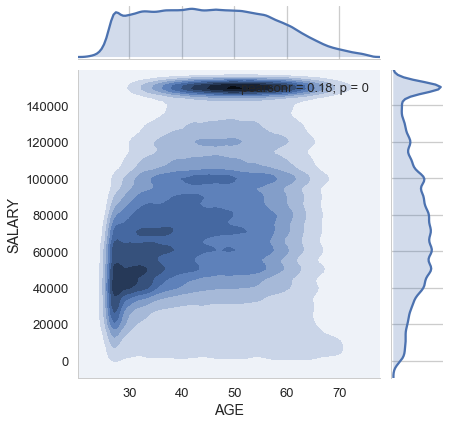

In [14]:

sns.jointplot(x='AGE',y='SALARY',data=df, kind='kde')

**General question: How many entries from each gender attended the STEM survey for year 2003 and 2013**
The count plot below indicates: 
1. More man participate in the survey than women for all the years.
2. There are more women participating in the survey every year.
3. There were less men participate in the survey in 2008 but it increased in 2013. 

This might indicate more women go to college or graduate schools in recent years. 

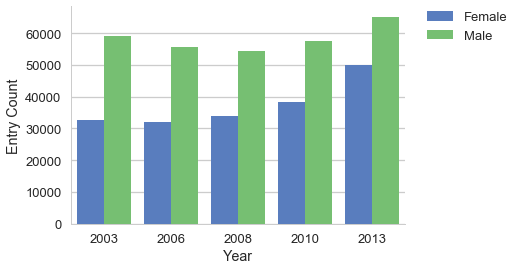

In [15]:
sns.countplot(x='YEAR',data=df,hue='GENDERS', palette="muted")
plt.xlabel('Year')
plt.ylabel('Entry Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [16]:
#how many people are employed for each gender?
LF_map = {1: 'Employed', 2: 'Unemployed', 3: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)
df_gender_employ = df.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

**What is the employment rate for each gender from the STEM community**
The bar plot below shows the employment rate in the STEM community for the female and male groups. It indicates the employment rate for all is between 80%-90% with around 3% higher rate for men than women. 

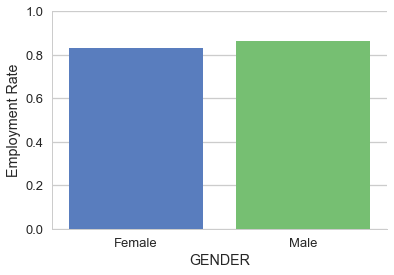

In [21]:
#count plot of employed and unemployed entries for genders.
sns.barplot(x='GENDERS', y='Employed', data = df_gender_employ, palette="muted")
plt.xlabel('GENDER')
plt.ylim([0,1])
plt.ylabel('Employment Rate')
sns.despine()

In [57]:
#a data frame for graduates only 
df_SDR = df[(df['SAMPLE']==602) |(df['SAMPLE']==602) | (df['SAMPLE']==1002)]
df_graduate = df[(df['DGRDG'] == 2) | (df['DGRDG'] == 3) | (df['DGRDG'] == 4)]
df_dr = df[(df['DGRDG'] == 3) ]

In [31]:
#a data frame for undergraduates only 
df_CR = df[(df['SAMPLE']==601) | (df['SAMPLE']==603) | (df['SAMPLE']==1001)]
df_undergraduate = df[(df['DGRDG'] == 1)]

In [32]:
df_2003 = df[df['YEAR']==2003]

In [33]:
df_2013 = df[df['YEAR']==2013]

In [40]:
employ_ug = df_undergraduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_ug.reset_index()
employ_ug_melt = pd.melt(employ_ug.reset_index(), id_vars ='GENDERS')
employed_ug_melt = employ_ug_melt[employ_ug_melt['LFSTATS']=='Employed']
employed_ug_melt['Degree'] = 'Undergraduate'
employed_ug_melt
employ_gr = df_graduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_gr.reset_index()
employ_gr_melt = pd.melt(employ_gr.reset_index(), id_vars ='GENDERS')
employed_gr_melt = employ_gr_melt[employ_gr_melt['LFSTATS']=='Employed']
employed_gr_melt['Degree'] = 'Graduate'
employed_gr_melt
employed_new = pd.concat([employed_ug_melt,employed_gr_melt])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


**A closer look at the employment rate**
The dot plot shows the employment rate for both female and male in the undergraduate and graduate groups. It is clear that the difference in employment diminishes for graduate group. In fact, female employment rate goes almost the same as males in graduate level groups! Can we consider this to be an effective career advice for female students? 

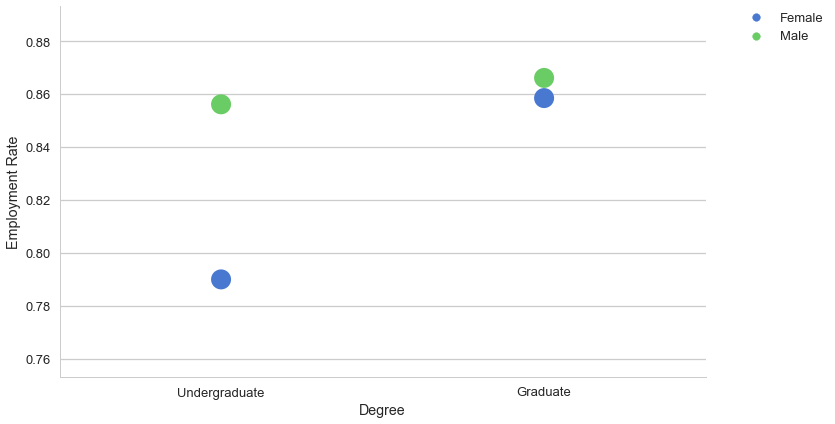

In [42]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Degree', y='value', data=employed, hue='GENDERS', size =20, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.ylabel('Employment Rate')

**What is the compensation distribution for each gender from the STEM community**
The violin plot below shows the salary in the STEM community for the female and male groups in year 2003 and 2013. Note that the salary is capped at $150,000 thus the could shaped cluster at the top of each violin. 
Several things we see: 
1. The median, and the quatiles wages for men is about 30\% higher than women, respectively.
2. Much more men are claiming to have wages equal or higher than 150,000 than women.
3. We see around 20\% increase in average wage from 2003 to 2013. However, the gender discrepancies are the same for both year 2003 and 2013. 

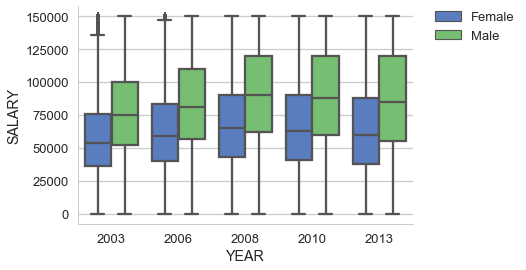

In [49]:
#bar plot of gender and salary 
sns.boxplot(data=df, y = 'SALARY', x = 'YEAR', hue = 'GENDERS', palette="muted")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

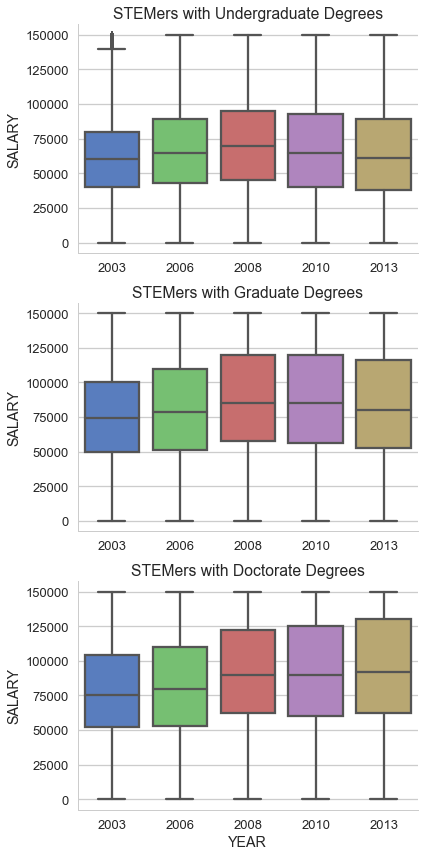

In [97]:
fig, axs = plt.subplots(nrows=3, figsize=(6,12))

#Plot undergraduate level salaries
sns.boxplot(data=df_undergraduate, y = 'SALARY', x = 'YEAR', palette="muted", ax=axs[0])
axs[0].set_title('STEMers with Undergraduate Degrees')
axs[0].set_xlabel('')

#Plot graduate level salaries 
sns.boxplot(data=df_graduate, y = 'SALARY', x = 'YEAR', palette="muted", hue_order=["Female", "Male"], ax=axs[1])
axs[1].set_title('STEMers with Graduate Degrees')
axs[1].set_xlabel('')


#Plot doctorate level salaries
sns.boxplot(data=df_dr, y = 'SALARY', x = 'YEAR', palette="muted", ax=axs[2])
axs[2].set_title('STEMers with Doctorate Degrees')
axs[2].set_xlabel('YEAR')
sns.despine()

plt.tight_layout()

**If an observation is from a minority group or not makes a difference in salary?**
The answer is YES. According to the survey data, a self-reported caucasion individual makes 19% more money in average than a minority individual. That is a significant difference. 

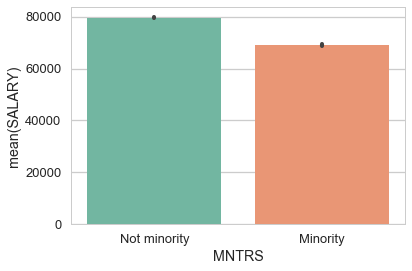

In [68]:
#Compare and visualize the minority factor
sns.barplot(data=df, y = 'SALARY', x = 'MNTRS', palette="Set2" )

**More detailed plot for the above plots?**
The box plot blow shows the salary distribution for both genders groups and three race categories. It gives visualization for both year 2003 (left) and 2013 (right). 
We already know: a. Men make more than women. b. Non-minorities make more than minorities.
What is new: 
1. The pay gap between men and women exist in all race groups. 
2. The average salary for caucasion and asian men are about the same. The same story does not apply to women group: the average salary for asian women is higher than the rest of female race groups. 
3. None of the pay gaps shrunk between year 2013 and 2003 for each race groups. As a matter of fact, they all got worse in 2013, if not the same. 

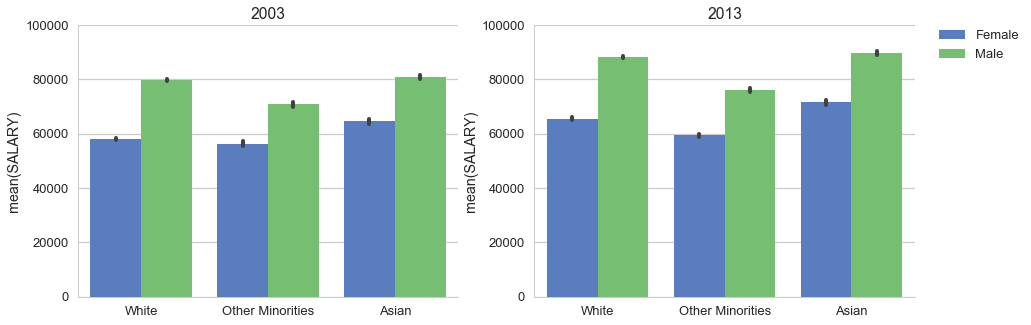

In [69]:

fig, axs = plt.subplots(ncols=2, figsize=(15,12))

#Compare and plot the SALARY of races and genders from year 2003 
sns.barplot(data=df[df['YEAR']==2003], y = 'SALARY', x = 'RACES', hue = 'GENDERS', palette="muted", ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylim([0,100000])


#Compare and plot the SALARY of races and genders from year 2013 
sns.barplot(data=df[df['YEAR']==2013], y = 'SALARY', x = 'RACES', hue = 'GENDERS', palette="muted", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].set_title('2013')
axs[1].set_xlabel('')
axs[1].set_ylim([0,100000])
sns.despine()


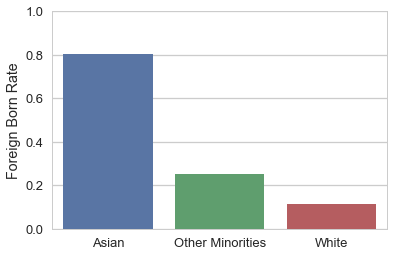

In [70]:
#countplot of entries of whether was born in US for each races.
df_bius = df.groupby('RACES')['BUSS'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='RACES', y='Not in the US', data=df_bius )
plt.xlabel('')
plt.ylim([0,1])
plt.ylabel('Foreign Born Rate')

In [37]:
#employ_by_mj= df.groupby('NDGMEMG')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [38]:
#Plot normalized results of job placement for the majors
# Without regression fit:
#sns.stripplot(x="NDGMEMG", y="Employed", data=employ_by_mj, size =20)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.despine()
#plt.legend(['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [71]:
employ_female_2003 = df_2003[df_2003['GENDERS']=='Female'].groupby('NDGMEMG')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()
employ_female_2003

LFSTATS,NDGMEMG,Employed,Unemployed
0,1,0.816439,0.183561
1,2,0.839365,0.160635
2,3,0.837686,0.162314
3,4,0.820836,0.179164
4,5,0.842365,0.157635
5,6,0.844156,0.155844
6,7,0.890203,0.109797


In [72]:
employ_female_2013 = df_2013[df_2013['GENDERS']=='Female'].groupby('NDGMEMG')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()
employ_female_2013

LFSTATS,NDGMEMG,Employed,Unemployed
0,1,0.823129,0.176871
1,2,0.821310,0.178690
2,3,0.836937,0.163063
3,4,0.813217,0.186783
4,5,0.879077,0.120923
5,6,0.830108,0.169892
6,7,0.864287,0.135713


**What is the female STEMers employment for field of major groups?**
The dot plot shows the female employment rate for field of major groups in 2003 and 2013. 
Things worth noticing:
1. The employment rate for non-science and engineering fields major remained above average for both years. A closer look reveals this group contains job title such as 'Management' and 'Administration'. 
2. There is a significant increase in the employment rate for the female engineering group (from 85% to 88%). 
3. The employment rate of another group who saw an increase from 2003 to 2013 is physical sciences. All the other group either remained a similar or received a lower rate.

Found trend from this plot!

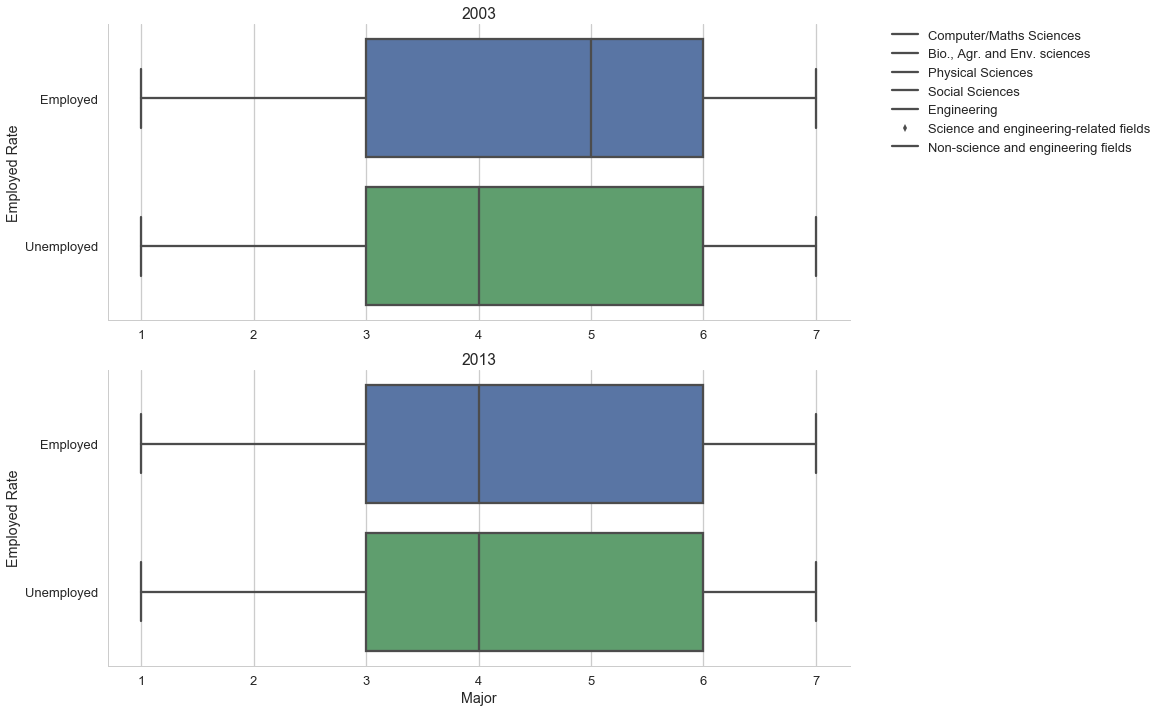

In [73]:
fig, axs = plt.subplots(nrows=2, figsize=(12,10))

#Compare and plot the employment percentage for male and female college graduates
sns.boxplot(x="NDGMEMG", y="LFSTATS", data=df_2003, ax=axs[0])
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylabel('Employed Rate')
axs[0].legend(['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Compare and plot the employment percentage for male and female doctor graduates
sns.boxplot(x="NDGMEMG", y="LFSTATS", data=df_2013, ax=axs[1])
axs[1].set_title('2013')
axs[1].set_xlabel('Major')
axs[1].set_ylabel('Employed Rate')
sns.despine()
plt.tight_layout()

fig.savefig('plot.png')

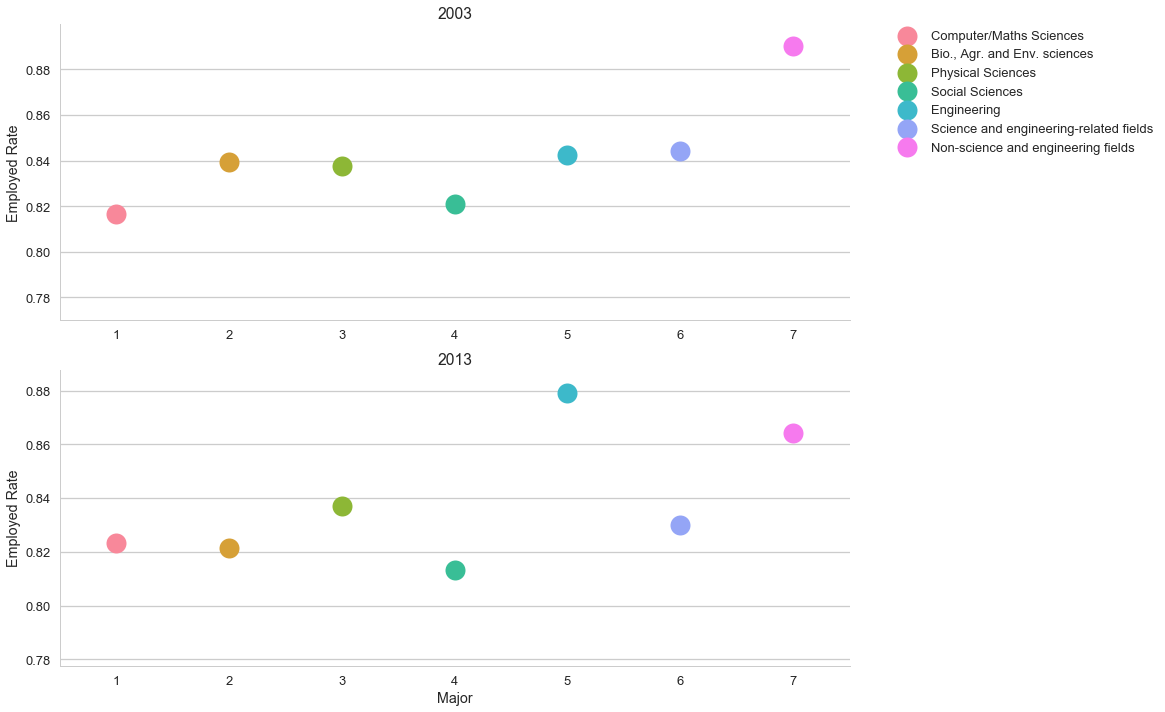

In [74]:
fig, axs = plt.subplots(nrows=2, figsize=(12,10))

#Compare and plot the employment percentage for male and female college graduates
sns.stripplot(x="NDGMEMG", y="Employed", data=employ_female_2003, size =20, ax=axs[0])
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylabel('Employed Rate')
axs[0].legend(['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Compare and plot the employment percentage for male and female doctor graduates
sns.stripplot(x="NDGMEMG", y="Employed", data=employ_female_2013, size =20, ax=axs[1])
axs[1].set_title('2013')
axs[1].set_xlabel('Major')
axs[1].set_ylabel('Employed Rate')
sns.despine()
plt.tight_layout()

In [75]:
df_job_gender = df.groupby('JobS')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_job_gender_melt = pd.melt(df_job_gender, id_vars ='JobS')

In [76]:
job_order = ['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields']

**Gender disparity by fields**
The job fields that have the most gender imbalance are: engineering, computer/maths sciences and physical sciences. There are four point six men for each woman working in Engineering field!

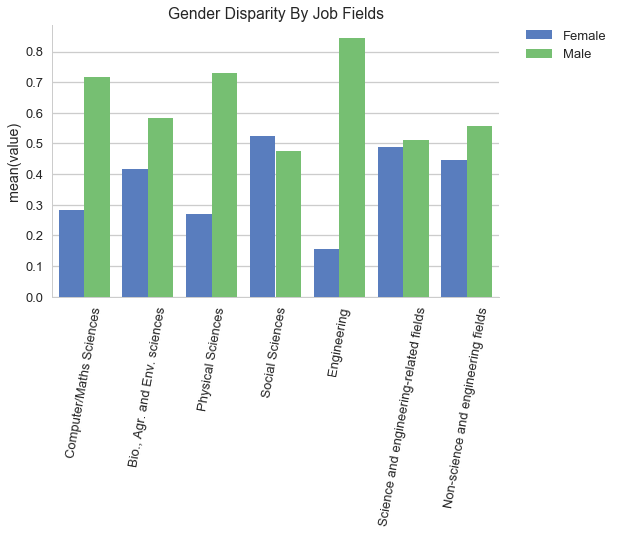

In [77]:
#Compare and plot the employment percentage for male and female college graduates
plt.figure(figsize=[8,5])
sns.barplot(x='JobS', y='value', data=df_job_gender_melt, hue='GENDERS', order=job_order, palette="muted")
plt.title('Gender Disparity By Job Fields')
plt.xticks(rotation=80)
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
#look at detailed group for explanation https://highered.ipums.org/highered-action/variables/NOCPR#codes_section 

**What is the pay disparity by genders and fields**
1. The job fields that have the least pay gap between men and women are: engineering, computer/maths sciences and bio/life sciences. 
2. Engineering field gives the best compensation to their female employees compared with other jobs. 
3. On the contrary, the lowest pay check for females goes to non-science and engineering field. The discrepancy in the compensation for male and female groups also goes to the same field. Recall that this group contains job title such as 'Management' and 'Administration'. This could be indicating the even severe gender disparity in management positions. 

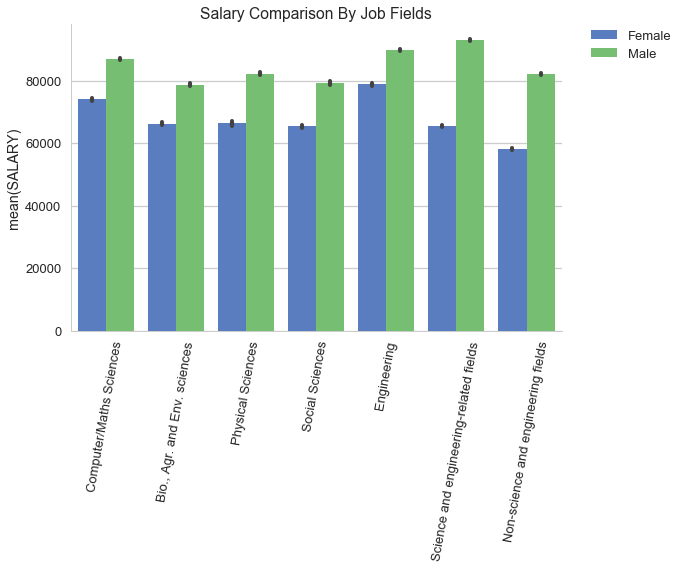

In [78]:
#plot of salary VS type of job 
plt.figure(figsize=(8,8))
sns.barplot(x="JobS", y="SALARY", data=df, hue="GENDERS", order=job_order, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Salary Comparison By Job Fields')
plt.xticks(rotation=80)
plt.xlabel('')
sns.despine()
plt.tight_layout()